
# First five halvings

In [1]:
import pandas as pd
from IPython.display import display, HTML

rows = []
COIN = 100_000_000

for i in range(0, 6):
    rows.append([i, str(210_000 * i) + " - " + str(210_000 * (i+1)), 50/(2 ** i) , int(50.0/(2 ** i) * COIN)])

df = pd.DataFrame(rows, columns=["Halving", "Block Count (Blockchain Height)", "Subsidy (in Bitcoin)", "Subsidy (in Satoshi)" ])

display(HTML(df.to_html(index=False)))

Halving,Block Count (Blockchain Height),Subsidy (in Bitcoin),Subsidy (in Satoshi)
0,0 - 210000,50.0000,5000000000
1,210000 - 420000,25.0000,2500000000
2,420000 - 630000,12.5000,1250000000
3,630000 - 840000,6.2500,625000000
4,840000 - 1050000,3.1250,312500000
5,1050000 - 1260000,1.5625,156250000



# Halving 30-35, float vs integer

In [2]:
import pandas as pd
from IPython.display import display, HTML

rows = []
COIN = 100_000_000

for i in range(30, 35 + 1):
    rows.append([i, str(210_000 * i) + " - " + str(210_000 * (i+1)), 50.0/(2 ** i) * COIN, int(50.0/(2 ** i) * COIN)])

df = pd.DataFrame(rows, columns=["Halving", "Block Amount (Blockchain Height)", "Subsidy (in Satoshi) [float]", "Subsidy (in Satoshi) [integer]" ])

display(HTML(df.to_html(index=False)))

Halving,Block Amount (Blockchain Height),Subsidy (in Satoshi) [float],Subsidy (in Satoshi) [integer]
30,6300000 - 6510000,4.656613,4
31,6510000 - 6720000,2.328306,2
32,6720000 - 6930000,1.164153,1
33,6930000 - 7140000,0.582077,0
34,7140000 - 7350000,0.291038,0
35,7350000 - 7560000,0.145519,0



# Subisdy Graph

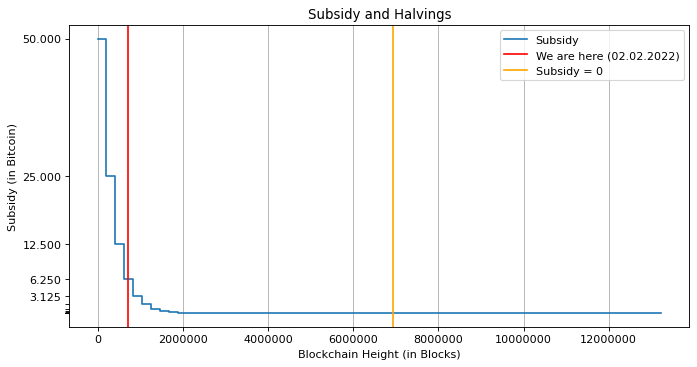

In [3]:
import numpy as np
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
from matplotlib.ticker import FormatStrFormatter

COIN = 100_000_000
initial_block_reward = 50
halving_interval = 210_000
halvings = 64
current_blockchain_height = 721_498
current_date = '02.02.2022'

bitcoin_creation_dead_blockchain_height = 6_930_000

blocks = np.arange(halvings) * halving_interval
reward = (COIN * initial_block_reward / (2 ** np.arange(halvings))).astype(int) / COIN

figure(figsize=(10, 5), dpi=80)
plot.step(blocks, reward, where='post', label='Subsidy')
plot.title('Subsidy and Halvings')
plot.xlabel('Blockchain Height (in Blocks)')
plot.ylabel('Subsidy (in Bitcoin)')
plot.ticklabel_format(useOffset=False, axis='x', style='plain')
plot.grid(True, axis='x')
plot.yticks(reward)
plot.axvline(x=current_blockchain_height, color='red', label=f'We are here ({current_date})')
plot.axvline(x=bitcoin_creation_dead_blockchain_height, color='orange', label=f'Subsidy = 0')
plot.legend(loc="upper right")

ax = plot.gca()
labels = ax.get_yticklabels()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
for i in range(1, halvings-4):
    labels[-i].set_visible(False)


plot.show()

#### How long does it take for Bitcoin to be halved?

$$
10 \mathrm{min} * 210\,000 = 21\,000\,000 \mathrm{min}
$$

$$
\frac{21\,000\,000 \mathrm{min}}{365 * 24 * 60} \approx 4 \mathrm{years}
$$

#### When will the last bitcoin be mined


The year of the last bitcoin can now be estimated like this:
$$
2009 + 33 * 4 \mathrm{years} = 2141
$$

A better estimation:

In [4]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

first_block_date = datetime(2009, 1, 3)
minutes = (33 * 210_000 * 10)

print("Year of last mined coin: " + str((first_block_date + relativedelta(minutes=minutes)).year))

Year of last mined coin: 2140


## What is the maximum total supply of Bitcoin?

$$ 50 * 210\,000 = 10\,500\,000 $$



$$ \frac{50}{2} * 210\,000 = 5\,250\,000 $$



$$ \frac{50}{4} * 210\,000 = 2\,625\,000 $$

#### Wrong

$$ \frac{50}{2^{0}} * 210\,000 + \frac{50}{2^{1}} * 210\,000 +  \frac{50}{2^{2}} * 210\,000 + \frac{50}{2^{3}} * 210\,000 + \cdots + \frac{50}{2^{32}} *  210\,000 = Total Bitcoins $$

$$ (\frac{50}{2^{0}} + \frac{50}{2^{1}} +  \frac{50}{2^{2}} + \frac{50}{2^{3}} + \cdots + \frac{50}{2^{32}}) * 210\,000 = Total Bitcoins $$

$$ \sum_{n = 0}^{32}  \frac{50}{x^{n}} * 210\,000 = Total Bitcoins $$


$$ Total Bitcoins = 20\,999\,999.99755528   $$

#### Correct
$$ \frac{\sum_{i = 0}^{32} \left \lfloor \frac{50 * 100\,000\,000}{x^{i}} \right \rfloor * 210\,000}{100\,000\,000} = \mathrm{Total Bitcoins} $$

$$ Total Bitcoins = 20\,999\,999.9769   $$



In [5]:
wrong = 0
correct = 0
shift = 0
error = 0

rows = []

for i in range(0, 33):
    # this is wrong because we include the fractions
    wrong += 210_000 * (50.0 * COIN / (2 ** i))

    # halving like the original with shift operator, which truncated fractions -> correct result
    shift += 210_000 * ((50 * COIN) >> i)

    # summing up the error
    error += 210_000 * (50.0 * COIN / (2 ** i)) - 210_000 * ((50 * COIN) >> i)

    # this is the corrected calculation, which truncates the decimals by using the floor method
    correct += 210_000 * np.floor(50.0 * COIN / 2 ** i)

    rows.append([i, str(wrong), str(shift), str(error)])


df = pd.DataFrame(rows, columns=["Halving", "Wrong calculation with fractions", "Original calculation with shift operator", "Error Delta" ])

display(HTML(df.to_html(index=False)))

print("wrong  ", wrong / COIN)
print("error", error )
print("shift  ", shift / COIN )
print("correct", correct / COIN )

Halving,Wrong calculation with fractions,Original calculation with shift operator,Error Delta
0,1050000000000000.0,1050000000000000,0.0
1,1575000000000000.0,1575000000000000,0.0
2,1837500000000000.0,1837500000000000,0.0
3,1968750000000000.0,1968750000000000,0.0
4,2034375000000000.0,2034375000000000,0.0
5,2067187500000000.0,2067187500000000,0.0
6,2083593750000000.0,2083593750000000,0.0
7,2091796875000000.0,2091796875000000,0.0
8,2095898437500000.0,2095898437500000,0.0
9,2097949218750000.0,2097949218750000,0.0


wrong   20999999.99755528
error 2065527.824163437
shift   20999999.9769
correct 20999999.9769


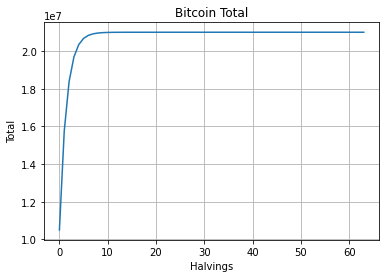

In [6]:
import numpy as np
import matplotlib.pyplot as plot

halving_interval = 210_000
reward_start = 50

halvings = np.arange(64)

total = np.arange(64)

total_tmp = 0

for a in halvings:
    total_tmp += halving_interval * (reward_start / 2 ** a)
    np.put(total, a, total_tmp)

plot.plot(halvings, total)
plot.title('Bitcoin Total')
plot.xlabel('Halvings')
plot.ylabel('Total')
plot.grid(True, which='both')
plot.show()